You are given a training dataset in CSV format (hw4_cluster.csv). The files each contain 40 rows with 2 columns. Column 1 & 2 are the features. There are no labels for this dataset. Your goal for this assignment is to implement different clustering algorithms and run them on this dataset. For this assignment you can assume the distance function is the Euclidean distance.

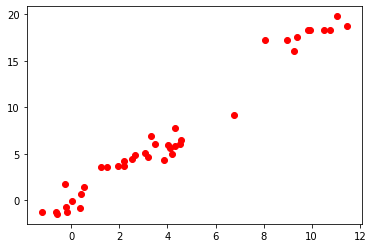

In [1]:
import autograd.numpy as np
from autograd import grad 
import matplotlib.pyplot as plt
import random
import math
import statistics
%matplotlib inline

csvname = 'hw4_cluster.csv'
data = np.loadtxt(csvname,delimiter = ',',skiprows=1)
x1=[]
x2=[]
for i in data:
    x1.append(i[0])
    x2.append(i[1])
plt.scatter(x1,x2,color='red')

1) (35 points) Implement a generalized K-means/median algorithm. You should have a single function that takes in as input the data points, K, and some other hyperparameters, specified below. The function should return K sets of data points. Each set corresponding to one cluster.

The hyperparameters your functions should support and the values they can take are:

-The method for calculating the centroid: Means or Median
-The initialization method: Random Split Initialization or Random Seed Selection Method
-Max_iter: max number of iterations to run the algorithm.
-K: number of clusters

Note that your stopping condition should have two parts: 
1) stop if you reach the max iterations 
2) stop if no change is made to the clusters in the last step.

You will be running this code in question 3 of the assignment. For this part you just need to
implement the function.

In [2]:
def meancentroid(points):
    x1=[]
    x2=[]
    for i in points: 
        x1.append(i[0])
        x2.append(i[1])
    return np.mean(x1), np.mean(x2)

def mediancentroid(points):
    x1=[]
    x2=[]
    for i in points: 
        x1.append(i[0])
        x2.append(i[1])
    return np.median(x1), np.median(x2)
        
def splitinitialization(points, k):
    clusters=[]
    for i in range(0,k):
        cluster=[]
        for j in range(0,math.floor(len(points)/k)):
            index=random.randrange(len(points))
            cluster.append(points[index])
            np.delete(points,index)
        clusters.append(cluster)
    return clusters
        
def seedinitialization(points, k):
    clusters=[]
    for i in range(0,k):
        index=random.randrange(len(points))
        clusters.append([points[index]])
        np.delete(points,index)
    return clusters

def distance(pt1, pt2):
    return math.sqrt(np.sum((pt1-pt2)**2))

def kclustering(points, centroidcalc, initialization, max_iter, k):
    change=True
    initpoints=points
    clusters=initialization(initpoints,k)
    centroids=[]
    its=0
    while its<max_iter and change==True:
        centroidsold=centroids
        centroids=[]
        for cluster in clusters:
            centroids.append(centroidcalc(cluster))
            cluster=[]
        for point in points:
            minindex=0
            index=0
            for i in centroids:
                if distance(i,point)<distance(centroids[minindex],point):
                    minindex=index
                index+=1
            clusters[minindex].append(point)
        if centroidsold==centroids:
            change=False
        its+=1
    return clusters
    

2) (15 points) SSE score. 
In this part of the assignment, you are implementing a function that calculates the SSE for a list of clusters. The function should take in a list of clusters (such as the output of the last function you implemented) and return a single SSE score.


In [3]:
def SSE(centroidcalc, clusters):
    SSE=0
    for cluster in clusters:
        centroid=centroidcalc(cluster)
        for point in cluster:
            SSE+=distance(centroid,point)
    return SSE

3) (15 points) Finding best K.
Run the code you implemented in question 1 for k=2,3,4,5. Set the other hyperparameters to the following:

-The method for calculating the centroid: Mean
-The initialization method: Random Split Initialization
-Max_iterations: 100

Calculate the SSE for each K using the function in question 2 and use these scores to pick the best K. What is the best K?



when k=5, the lowest SSE is observed, making it the best SSE in my opinion.

In [4]:
c2= kclustering(data, meancentroid, splitinitialization, 100, 2)

c3= kclustering(data, meancentroid, splitinitialization, 100, 3)

c4= kclustering(data, meancentroid, splitinitialization, 100, 4)

c5= kclustering(data, meancentroid, splitinitialization, 100, 5)

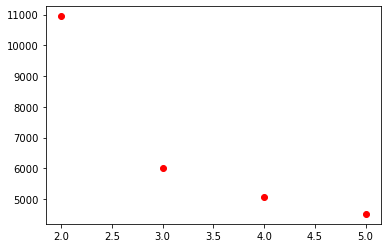

In [5]:
s2=SSE(meancentroid, c2)
s3=SSE(meancentroid, c3)
s4=SSE(meancentroid, c4)
s5=SSE(meancentroid, c5)
plt.scatter([2,3,4,5],[s2,s3,s4,s5],color='red')

Don’t be so Naïve! 

You are given a training dataset in CSV format (hw4_naive.csv). The training data has 5,600 rows:

• Columns 1 through 6 of the given CSV file represent the features (X)
• The last column (“Label”) represents the class label (Y) (0 or 1)

You are required to implement the following models and train/test them using this
dataset. Note that you can use sklearn unless the question asks that you implement your code from scratch.


1) (5 points) Divide the data into test / train sets (80% and 20% respectively)



In [6]:
csvname = 'hw4_naive.csv'
data = np.loadtxt(csvname,delimiter = ',',skiprows=1)
from sklearn.model_selection import train_test_split 
train, test= train_test_split(data, test_size=0.20)

2) (25 points) Implement a Multinomial Naïve Bayes classifier from scratch, with smoothing (you can set the default smoothing value to 1). You are free to code this up however you like, however, make sure that there is a function that can be called with a test X vector and returns the predicted Y.



In [7]:
def multinomialbayes(train, x):
    likelihood=0
    prior=0
    numrows=0
    for row in train:
        numrows+=1
        prior+=row[6]
    prior=prior/numrows
    
    m= [row for row in train if [1]==row[6]]
    n= [row for row in train if [0]==row[6]]
    
    mcount=[1,1,1,1,1,1]
    ncount=[1,1,1,1,1,1]
    
    for row in m:
        for i in range(len(row)-1):
            if row[i]==x[i]:
                mcount[i]+=1
    for row in n:
        for i in range(len(row)-1):
            if row[i]==x[i]:
                mcount[i]+=1
    
    
    a1=np.product(n)*(1-prior)/(len(n)+2)**5
    a2=np.product(m)*prior/(len(m)+2)**5
    
    if a1>a2:
        return 0
    return 1


multinomialbayes(train, [14303,102632,-5702.2,144,281,4061,1])

/Users/calliemoody/opt/anaconda3/envs/testenv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/calliemoody/opt/anaconda3/envs/testenv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


1

3) (25 points) Implement a Gaussian Naïve Bayes classier from scratch (no need for smoothing here).



In [8]:
def gaussianbayes(train, x):
    likelihood=0
    prior=0
    numrows=0
    for row in train:
        numrows+=1
        prior+=row[6]
    prior=prior/numrows
    
    m= [row for row in train if [1]==row[6]]
    n= [row for row in train if [0]==row[6]]
    
    mcount=[[],[],[],[],[],[]]
    ncount=[[],[],[],[],[],[]]
    
    for row in m:
        for i in range(len(row)-1):
            mcount[i].append(row[i])
    for row in n:
        for i in range(len(row)-1):
            ncount[i].append(row[i])
    means0=[]
    means1=[]
    std0=[]
    std1=[]
    for i in range(len(row)-1):
        np.array(ncount[i])
        np.array(mcount[i])
        means0.append(np.mean(ncount[i]))
        means1.append(np.mean(mcount[i]))
        std0.append(np.std(ncount[i])**2)
        std1.append(np.std(mcount[i])**2)
        
    a0=(1-prior)
    a1=prior
    
    for i in range(len(row)-1):
        a0=a0*(1/math.sqrt(2*math.pi*std0[i]))*np.exp(0-(x[i]-means0[i])/(2*std0[i]))
        a1=a1*(1/math.sqrt(2*math.pi*std1[i]))*np.exp(0-(x[i]-means1[i])/(2*std1[i]))
    
    if a1<a0:
        return 0
    return 1


gaussianbayes(train, [14303,102632,-5702.2,144,281,4061,1])

0

4) (10 points) Calculate the accuracy and the F1 score of test data using both of your models
implemented above.

In [ ]:
TP=0
FP=0
FN=0
TN=0
TPm=0
FPm=0
FNm=0
TNm=0
for x in test:
    pred=gaussianbayes(train,x)
    if pred==1 and x[6]==[1]:
        TP+=1
    elif pred==1:
        FP+=1
    elif x[6]==[1]:
        FN+=1
    else:
        TN+=1
    predm=multinomialbayes(train,x)
    if predm==1 and x[6]==[1]:
        TPm+=1
    elif predm==1:
        FPm+=1
    elif x[6]==[1]:
        FNm+=1
    else:
        TNm+=1 

In [ ]:
precision=TP/(TP+FP)
recall=TP/(TP+FN)
accuracy=(TP+TN)/(TP+TN+FP+FN)
F1=2*precision*recall/(precision+recall)
print("gaussian F1 = ")
print (F1)
print("gaussian accuracy = ")
print (accuracy)
    
precisionm=TPm/(TPm+FPm)
recallm=TPm/(TPm+FNm)
accuracym=(TPm+TNm)/(TPm+TNm+FPm+FNm)
F1m=2*precisionm*recallm/(precisionm+recallm)
print( "multinomial F1 = ")
print (F1m)
print( "multinomial accuracy = ")
print (accuracym)